## Name : Pranjal Lohia
## PRN : 202201070022
## Branch : Electronics and Telecommunication
## GITHUB link: https://github.com/pranjal20lohia/Neural-Network-Implementation-from-Scratch.git

# **Logistic Regression from Scratch**

Accuracy: 99.00%


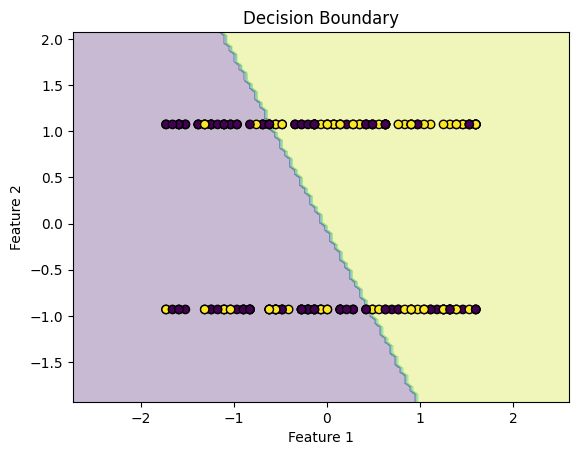

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/heart_disease_dataset.csv')

# Features and target
X = data.drop('heart_disease', axis=1).values
y = data['heart_disease'].values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

# Training the model
model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting decision boundary for first two features
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Pad with zeros to match the number of features
    grid = np.c_[xx.ravel(), yy.ravel()]
    if grid.shape[1] < model.weights.shape[0]:
        padding = np.zeros((grid.shape[0], model.weights.shape[0] - grid.shape[1]))
        grid = np.hstack((grid, padding))

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X_test[:, :2], y_test, model)

Accuracy: 77.40%


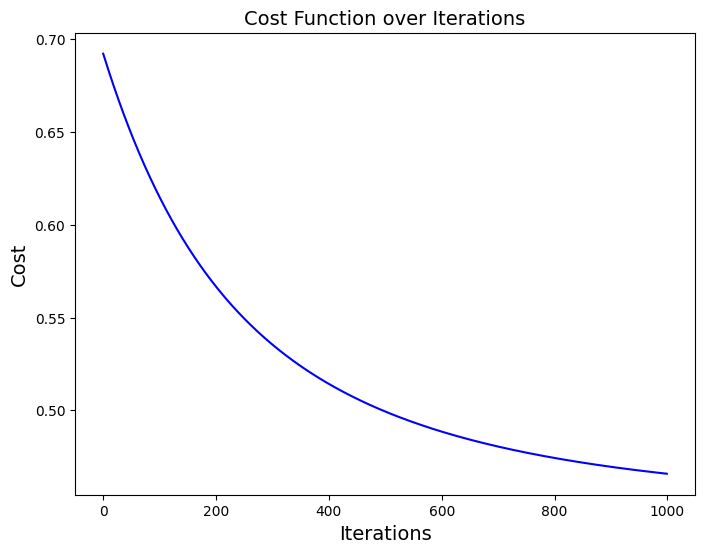

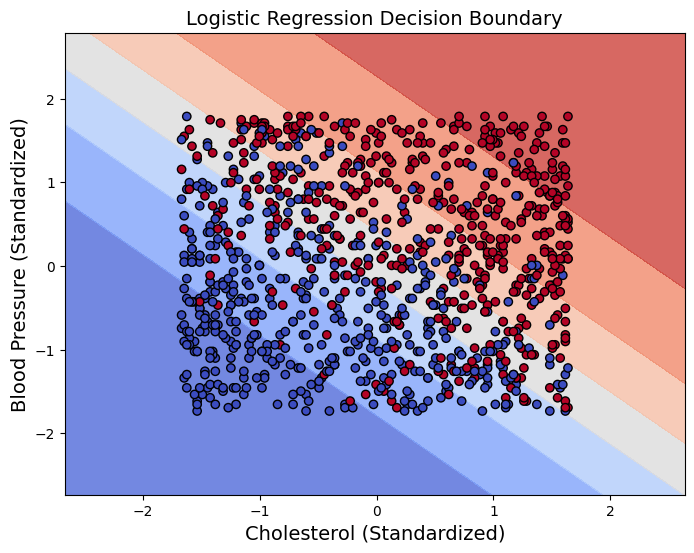

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logistic function (sigmoid)
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Log loss function
def log_loss(y, y_dash):
    return - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))

# Cost function using vectorization
def cost_func_vec(y, y_dash):
    m = len(y)
    loss_vec = np.array([log_loss(y[i], y_dash[i]) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m)) / m
    return cost

# Cost function in terms of model parameters (using vectorization)
def cost_logreg_vec(X, y, w, b):
    m, n = X.shape
    z = np.matmul(X, w) + b
    y_dash = logistic(z)
    return cost_func_vec(y, y_dash)

# Gradient computation
def compute_gradients(X, y, w, b):
    m = len(y)
    z = np.matmul(X, w) + b
    y_dash = logistic(z)

    dw = np.dot(X.T, (y_dash - y)) / m
    db = np.sum(y_dash - y) / m

    return dw, db

# Gradient Descent for logistic regression
def gradient_descent(X, y, w, b, learning_rate, iterations):
    cost_history = []

    for _ in range(iterations):
        dw, db = compute_gradients(X, y, w, b)

        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute cost after updating
        cost = cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

# Full logistic regression model
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights as zero
    b = 0            # Initialize bias as zero

    w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, iterations)

    return w, b, cost_history

# Load the heart disease dataset
heart_df = pd.read_csv("heart_disease_dataset.csv")  # Update with the correct path

# Selecting two numerical features for visualization
features = ['cholesterol', 'blood_pressure']
target_col = 'heart_disease'
X = heart_df[features].values
y = heart_df[target_col].values

# Normalize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Train the logistic regression model
learning_rate = 0.01
iterations = 1000
w, b, cost_history = logistic_regression(X, y, learning_rate, iterations)

# Predict function
def predict(X, w, b):
    z = np.matmul(X, w) + b
    return logistic(z)

# Predictions
predictions = predict(X, w, b)
predictions = (predictions >= 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the cost function history
plt.figure(figsize=(8, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost Function over Iterations", fontsize=14)
plt.show()

# Plotting the decision boundary
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))

    # Create grid points to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')

    plt.xlabel('Cholesterol (Standardized)', fontsize=14)
    plt.ylabel('Blood Pressure (Standardized)', fontsize=14)
    plt.title("Logistic Regression Decision Boundary", fontsize=14)
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, w, b)

# **Logistic Regression with Library**

Accuracy: 0.99
Confusion Matrix:
 [[ 98   1]
 [  1 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.99      0.99      0.99       101

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



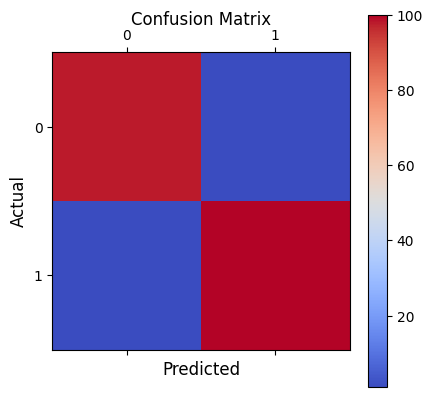

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the heart disease dataset
file_path = '/content/heart_disease_dataset.csv'
df = pd.read_csv(file_path)

# Features and target selection
X = df[['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes', 'smoking', 'exercise']].values
y = df['heart_disease'].values  # Target column

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Plot confusion matrix
plt.matshow(conf_matrix, cmap='coolwarm')
plt.title('Confusion Matrix', pad=20)
plt.colorbar()
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()


# **Activation Functions**

# Sigmoid Function

In [ ]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
sigmoid(100)

1.0

In [ ]:
sigmoid(-2)

0.11920292202211755

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid():
    x = np.linspace(-10, 10, 100)
    y = 1 / (1 + np.exp(-x))

    plt.plot(x, y)
    plt.xlabel('Input')
    plt.ylabel('Sigmoid Output')
    plt.title('Sigmoid Activation Function')
    plt.grid(True)
    plt.show()

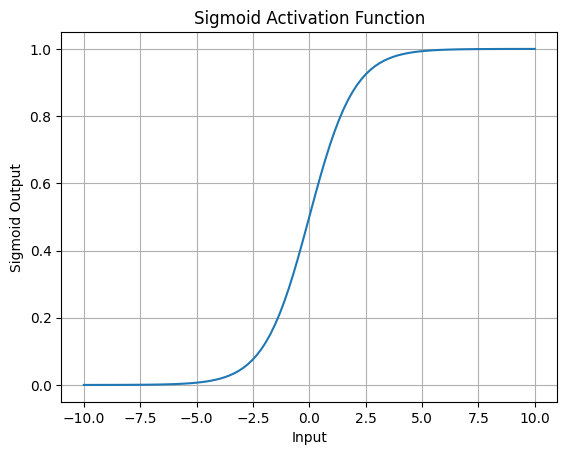

In [ ]:
plot_sigmoid()

# TANH Function

In [ ]:
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [ ]:
tanh(-56)

-1.0

In [ ]:
tanh(1)

0.7615941559557649

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_tanh():

    x = np.linspace(-10, 10, 100)

    tanh = np.tanh(x)

    plt.plot(x, tanh)
    plt.title("Hyperbolic Tangent (tanh) Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    plt.grid(True)
    plt.show()

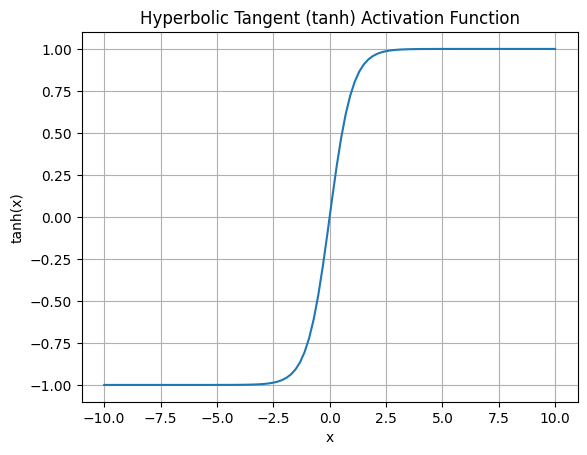

In [ ]:
plot_tanh()

# RELU

In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
relu(-100)

0

In [ ]:
relu(8)

8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_relu():

    x = np.linspace(-10, 10, 100)

    relu = np.maximum(0, x)

    plt.plot(x, relu)
    plt.title("ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    plt.grid(True)
    plt.show()

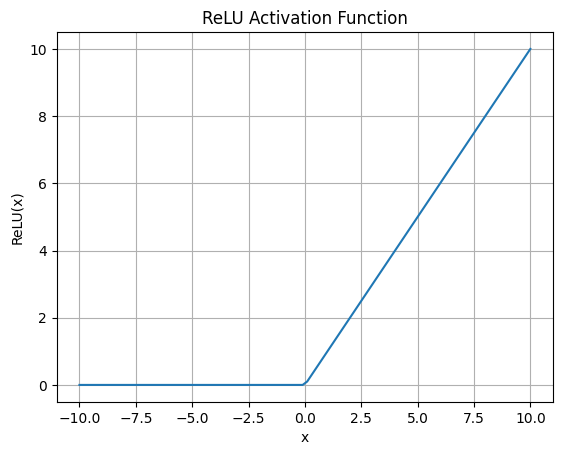

In [ ]:
   plot_relu()

# **Log Loss Function**

In [ ]:
# Log loss
def log_loss(y, y_dash):
    """Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (scalar): true value (0 or 1)
      y_dash (scalar): predicted value (probability of y being 1)
    Returns:
      loss (float): nonnegative loss corresponding to y and y_dash
    """
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

y, y_dash = 1, 0.9
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 0, 0.3
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 1, 0.7
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")
y, y_dash = 0, 0.2
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

log_loss(1, 0.9) = 0.10536051565782628
log_loss(0, 0.3) = 0.35667494393873245
log_loss(1, 0.7) = 0.35667494393873245
log_loss(0, 0.2) = 0.2231435513142097


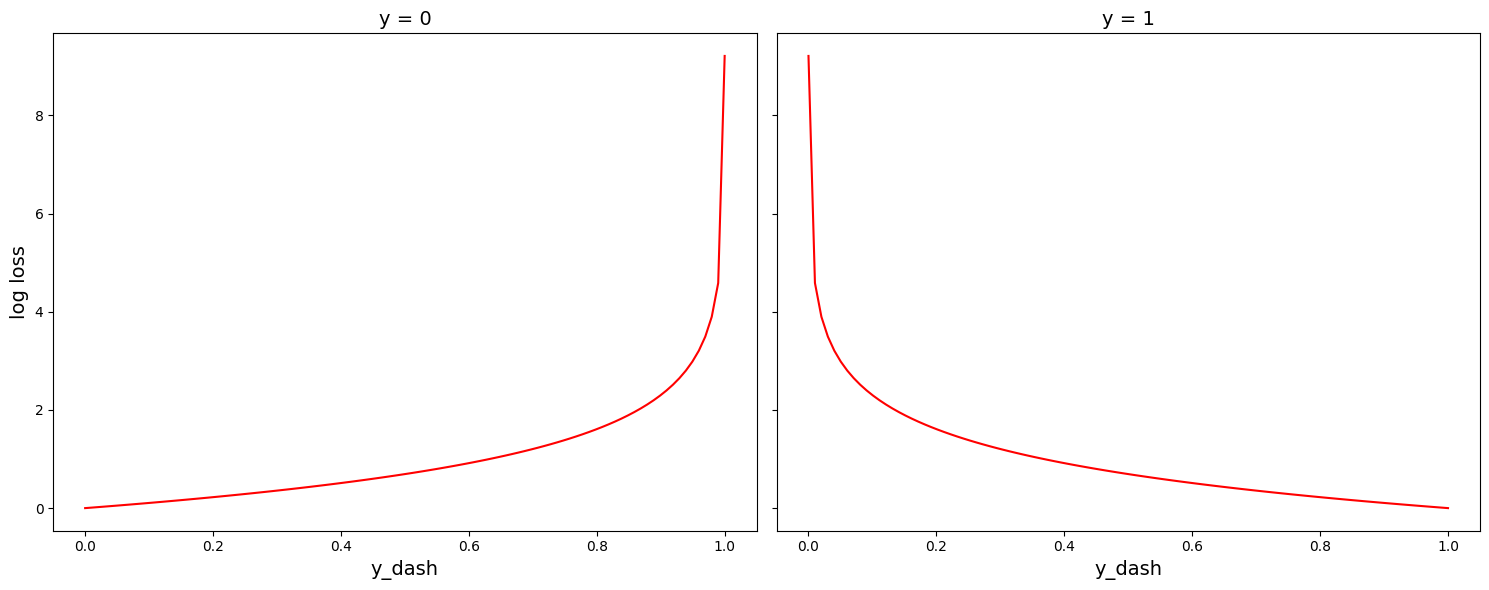

In [ ]:
# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_dash = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_dash, log_loss(0, y_dash), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_dash", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_dash, log_loss(1, y_dash), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_dash", fontsize = 14)
plt.tight_layout()
plt.show()

# **Sklearn Implementation of MultiLayer Perceptron(MLP)**

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        99
           1       0.98      0.98      0.98       101

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



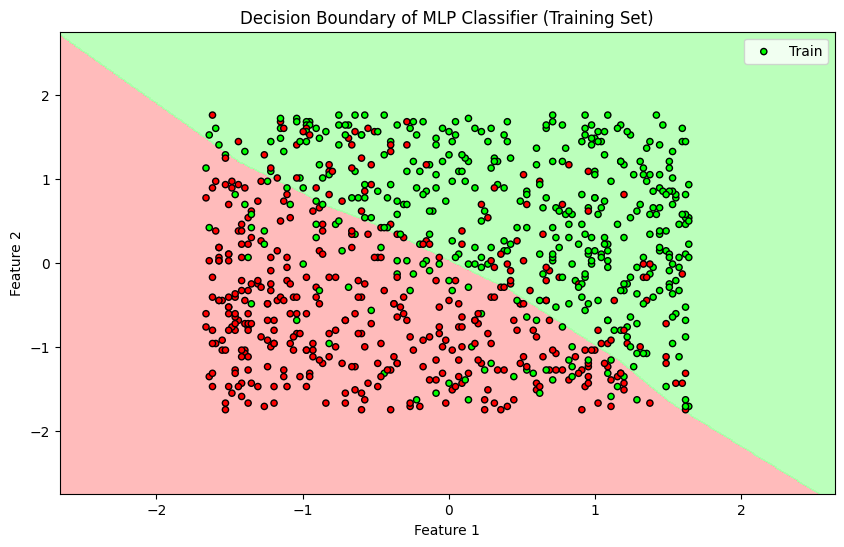

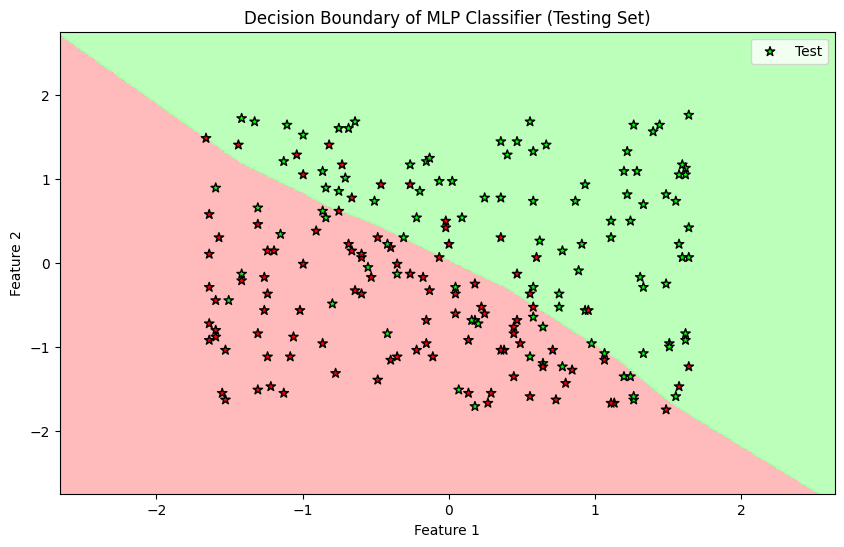

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Heart Disease dataset
data = pd.read_csv("/content/heart_disease_dataset.csv")

# Selecting features and target variable
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values   # Last column as target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the main MLP classifier (trained on all features)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ===========================
# Train a separate classifier for visualization (only on two selected features)
# ===========================
X_vis = data.iloc[:, [2, 3]].values  # Selecting two relevant features (adjust indexes as needed)
y_vis = data.iloc[:, -1].values  # Target labels

# Split and scale the visualization dataset
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
scaler_vis = StandardScaler()
X_vis_train = scaler_vis.fit_transform(X_vis_train)
X_vis_test = scaler_vis.transform(X_vis_test)

# Define a new MLP model for visualization
mlp_vis = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_vis.fit(X_vis_train, y_vis_train)

# ===========================
# Plot decision boundary for training set
# ===========================
x_min, x_max = X_vis_train[:, 0].min() - 1, X_vis_train[:, 0].max() + 1
y_min, y_max = X_vis_train[:, 1].min() - 1, X_vis_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_vis_train[:, 0], X_vis_train[:, 1], c=y_vis_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# ===========================
# Plot decision boundary for testing set
# ===========================
x_min, x_max = X_vis_test[:, 0].min() - 1, X_vis_test[:, 0].max() + 1
y_min, y_max = X_vis_test[:, 1].min() - 1, X_vis_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_vis_test[:, 0], X_vis_test[:, 1], c=y_vis_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# **Keras Implementation of MultiLayer Perceptron(MLP)**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5201 - loss: 0.6890 - val_accuracy: 0.5875 - val_loss: 0.6549
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5937 - loss: 0.6427 - val_accuracy: 0.6750 - val_loss: 0.6081
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7141 - loss: 0.5878 - val_accuracy: 0.7125 - val_loss: 0.5624
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.5362 - val_accuracy: 0.7812 - val_loss: 0.5082
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8445 - loss: 0.4781 - val_accuracy: 0.8438 - val_loss: 0.4448
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8526 - loss: 0.4304 - val_accuracy: 0.8750 - val_loss: 0.3791
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9045 - loss: 0.3646 - val_accuracy: 0.9312 - val_loss: 0.3171
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9294 - loss: 0.3080 - val_accuracy: 0.9312 - val_loss: 0.2649
Ep

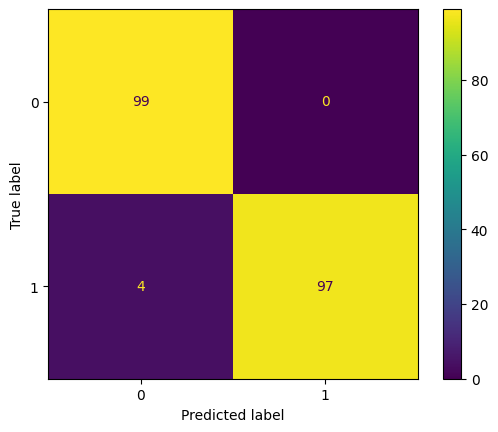

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Step 1: Load the heart disease dataset
file_path = '/content/heart_disease_dataset.csv'
df = pd.read_csv(file_path)

# Features and target selection
X = df[['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes', 'smoking', 'exercise']].values
y = df['heart_disease'].values  # Target column

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (helps with convergence and performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build the ANN model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),  # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 6: Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Step 7: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


# **Backward Propogation from Sratch**

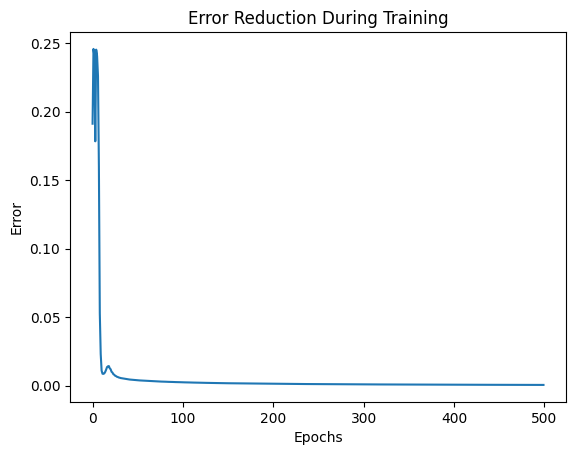


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.98      0.99       101

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



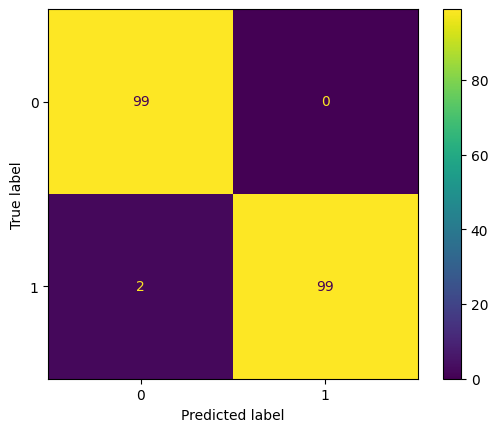

Sample Predictions: [1 0 1 1 0 1 1 1 0 0]


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# Feedforward Function
def feed_forward(b1, b2, w1, w2, x):
    hidden = sigmoid(np.dot(x, w1) + b1)    # Hidden layer activation
    output = sigmoid(np.dot(hidden, w2) + b2)  # Output layer activation
    return hidden, output

# Error Calculation
def find_error(output, desired):
    return np.mean((output - desired) ** 2) / 2

# Backpropagation
def back_propagate(w1, w2, b1, b2, hidden, output, desired, x, alpha):
    # Output layer error
    delta_output = (output - desired) * sigmoid_derivative(output)

    # Hidden layer error
    delta_hidden = np.dot(delta_output, w2.T) * sigmoid_derivative(hidden)

    # Update weights and biases
    w2 -= alpha * np.dot(hidden.T, delta_output)
    w1 -= alpha * np.dot(x.T, delta_hidden)
    b2 -= alpha * np.sum(delta_output, axis=0)
    b1 -= alpha * np.sum(delta_hidden, axis=0)

    return w1, w2, b1, b2

# Load the heart disease dataset
file_path = '/content/heart_disease_dataset.csv'
df = pd.read_csv(file_path)

# Feature and target selection
X = df[['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes', 'smoking', 'exercise']].values
y = df['heart_disease'].values.reshape(-1, 1)  # Target reshaped for compatibility

# Data Standardization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network Initialization
input_size = X_train.shape[1]
hidden_size = 6  # Number of neurons in hidden layer
output_size = 1  # Binary output (0 or 1)

np.random.seed(42)
w1 = np.random.rand(input_size, hidden_size)
w2 = np.random.rand(hidden_size, output_size)
b1 = np.random.rand(hidden_size)
b2 = np.random.rand(output_size)

# Training Parameters
epochs = 500
alpha = 0.1  # Learning rate
error = []

# Training Loop
for epoch in range(epochs):
    hidden, output = feed_forward(b1, b2, w1, w2, X_train)
    error.append(find_error(output, y_train))
    w1, w2, b1, b2 = back_propagate(w1, w2, b1, b2, hidden, output, y_train, X_train, alpha)

# Plot Error Reduction Over Time
plt.plot(error)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction During Training")
plt.show()

# Final Evaluation on Test Data
_, y_pred = feed_forward(b1, b2, w1, w2, X_test)
y_pred = (y_pred > 0.5).astype(int)  # Threshold for binary classification

# Classification Report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Final Outputs after Training
print("Sample Predictions:", y_pred[:10].flatten())
